In [22]:
#The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is: f=c×1.8+32

In [2]:
#it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning.

In [3]:
"""we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).
Then, we will train a model that figures out the above formula through the training process."""

'we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).\nThen, we will train a model that figures out the above formula through the training process.'

In [5]:
#Import dependencies
"""First, import TensorFlow. Here, we're calling it tf for ease of use.Next,import NumPy as np. Numpy helps us to represent our data as highly performant lists."""

"First, import TensorFlow. Here, we're calling it tf for ease of use.Next,import NumPy as np. Numpy helps us to represent our data as highly performant lists."

In [6]:
import tensorflow as tf

In [7]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [8]:
"""Since the task in this Codelab is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists celsius_q and fahrenheit_a that we can use to train our model."""

'Since the task in this Codelab is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists celsius_q and fahrenheit_a that we can use to train our model.'

In [9]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [11]:
#Create the model
"""Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron."""

'Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.'

In [12]:
#Build a layer
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [24]:
#Assemble layers into the model
"""The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output. This model has just a single layer, l0."""
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [25]:
#Compile the model, with loss and optimizer functions
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [26]:
"""TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function (mean squared error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point."""

'TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:\n\nThe loss function (mean squared error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.'

In [27]:
#Train the model
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


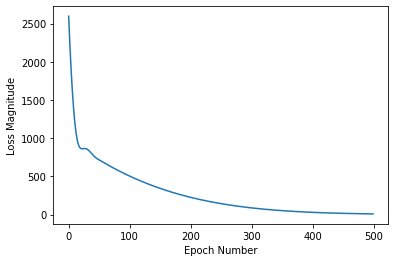

In [28]:
#Display training statistics
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [17]:
#Use the model to predict values
print(model.predict([100.0]))

[[211.27216]]


In [21]:
#Looking at the layer weights
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[0.63910896, 0.57493746, 0.33406052, 0.01630329]], dtype=float32), array([ 3.0054867,  3.0013103, -2.6970248,  2.3704088], dtype=float32)]


In [20]:
"""what if we created more Dense layers with different units, which therefore also has more variables?"""
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[0.63910896, 0.57493746, 0.33406052, 0.01630329]], dtype=float32), array([ 3.0054867,  3.0013103, -2.6970248,  2.3704088], dtype=float32)]
These are the l1 variables: [array([[-0.4371318 ,  0.5299758 , -0.11285223,  0.14975548],
       [-0.7819233 ,  0.3937582 , -0.14272338,  0.8474583 ],
       [ 0.80432665, -0.04365858,  0.383971  , -0.32102948],
       [-0.37925616,  0.47578603, -0.03831056, -0.20539711]],
      dtype=float32), array([-2.9470637,  2.993932 ,  2.6461854,  3.0041652], dtype=float32)]
These are the l2 variables: [array([[-1.4147075 ],
       [ 1.1915883 ],
       [ 0.44363984],
       [ 1.026018  ]], dtype=float32), array([3.029644], dtype=float32)]
